https://lsoovmee-rhino.tistory.com/173  

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
tf.__version__

'2.15.0'

In [ ]:
base_model = tf.keras.applications.InceptionV3(include_top=False, weights='imagenet') #top = False, Dense층은 불러오지 않음
#InceptionV3 모델
#mixed 다른 층과 연결된 부분
#각각의 특성추출기가 추출한 이미지의 특징들이 다양한데 그것을 합치는 것

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalizati

In [ ]:
names = ['mixed3', 'mixed5']

In [ ]:
layers = [base_model.get_layer(name).output for name in names]

In [ ]:
deep_dream_model = tf.keras.Model(inputs=base_model.input, outputs=layers) #2개의 출력층
deep_dream_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0]

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/ColabDrive/Computer_Vision_Masterclass/Images/StaryNight.jpg', target_size=(255,375))

[(6, 10, 11),
 (30, 33, 66),
 (35, 46, 66),
 (39, 46, 65),
 (46, 49, 68),
 (23, 27, 39),
 (13, 15, 38),
 (57, 61, 86),
 (85, 88, 97),
 (147, 147, 139),
 (138, 139, 123),
 (112, 116, 117),
 (18, 21, 52),
 (23, 28, 60),
 (85, 96, 116),
 (83, 92, 121),
 (148, 152, 155),
 (29, 32, 63),
 (57, 63, 99),
 (12, 20, 39),
 (34, 39, 69),
 (23, 30, 56),
 (4, 12, 48),
 (25, 32, 74),
 (48, 50, 98),
 (134, 133, 173),
 (127, 132, 152),
 (126, 133, 161),
 (138, 151, 168),
 (64, 76, 126),
 (67, 83, 119),
 (61, 75, 112),
 (73, 90, 134),
 (86, 118, 143),
 (55, 81, 80),
 (136, 155, 135),
 (51, 65, 74),
 (152, 169, 195),
 (156, 176, 211),
 (56, 79, 129),
 (94, 116, 165),
 (70, 94, 120),
 (160, 173, 189),
 (142, 156, 185),
 (92, 118, 135),
 (50, 74, 118),
 (107, 132, 162),
 (101, 122, 153),
 (27, 36, 67),
 (34, 44, 79),
 (97, 114, 140),
 (21, 41, 66),
 (51, 60, 101),
 (50, 56, 104),
 (34, 39, 68),
 (22, 24, 45),
 (3, 3, 29),
 (4, 7, 22),
 (28, 37, 34),
 (19, 27, 29),
 (19, 25, 41),
 (43, 49, 75),
 (93, 104, 1

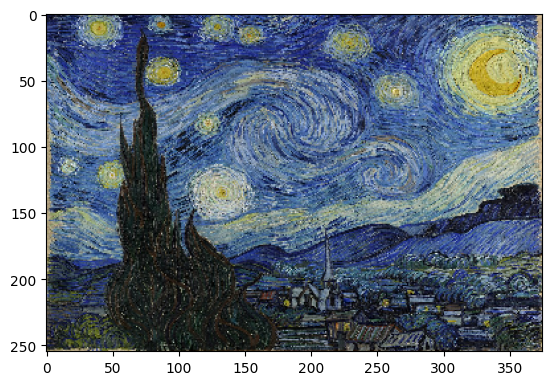

In [ ]:
plt.imshow(image);
list(image.getdata())

In [ ]:
image = tf.keras.preprocessing.image.img_to_array(image)

In [ ]:
type(image), image.shape, image.min(), image.max()

(numpy.ndarray, (255, 375, 3), 0.0, 255.0)

In [ ]:
#image = image / 255 -> Inception을 사용합니다
image = tf.keras.applications.inception_v3.preprocess_input(image)
image.min(), image.max()

(-1.0, 1.0)

In [ ]:
image_batch = tf.expand_dims(image, axis=0)
image_batch.shape

TensorShape([1, 255, 375, 3])

In [ ]:
activations = deep_dream_model.predict(image_batch)

1/1 [==============================] - 1s 682ms/step


In [ ]:
deep_dream_model.outputs, activations[0].shape, activations[1].shape

([<KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed3')>,
  <KerasTensor: shape=(None, None, None, 768) dtype=float32 (created by layer 'mixed5')>],
 (1, 14, 21, 768),
 (1, 14, 21, 768))

In [ ]:
def calculate_loss(image, network): # mixed3, mixed5의 아웃풋의 평균값
  image_batch = tf.expand_dims(image, axis=0)
  activations = network(image_batch)
  losses = []
  for act in activations:
    loss = tf.math.reduce_mean(act)
    losses.append(loss)

  return tf.reduce_sum(losses)

In [ ]:
calculate_loss(image, deep_dream_model)

1/1 [==============================] - 0s 110ms/step


<tf.Tensor: shape=(), dtype=float32, numpy=0.61425436>

In [ ]:
k, v = deep_dream(deep_dream_model, image, 0.01)

1) <class 'tensorflow.python.framework.ops.SymbolicTensor'> 
 [[[-0.952941179 -0.921568632 -0.913725495]
  [-0.764705896 -0.741176486 -0.482352912]
  [-0.725490212 -0.639215708 -0.482352912]
  ...
  [0.36470592 0.207843184 0.0196079016]
  [0.247058868 0.137254953 -0.137254894]
  [0.498039246 0.388235331 0.0823529959]]

 [[-0.898039222 -0.890196085 -0.733333349]
  [-0.764705896 -0.749019623 -0.427450955]
  [-0.80392158 -0.749019623 -0.521568656]
  ...
  [0.309803963 0.160784364 -0.0980392098]
  [0.498039246 0.380392194 0.0745098591]
  [0.372549057 0.247058868 -0.0117647052]]

 [[-0.945098042 -0.929411769 -0.733333349]
  [-0.788235307 -0.772549033 -0.474509776]
  [-0.882352948 -0.850980401 -0.654902]
  ...
  [0.615686297 0.450980425 0.207843184]
  [0.647058845 0.505882382 0.207843184]
  [0.58431375 0.435294151 0.176470637]]

 ...

 [[-0.607843161 -0.639215708 -0.913725495]
  [-0.78039217 -0.717647076 -0.882352948]
  [-0.717647076 -0.631372571 -0.694117665]
  ...
  [0.200000048 0.13725495

In [ ]:
#gradient ascent
#https://www.inflearn.com/questions/174459/tf-function은-무슨-역할을-하는-코드인가요
@tf.function
def deep_dream(network, image, learning_rate):
  with tf.GradientTape() as tape: #텐서플로 api불러오기, 연산결과를 기록함
    tape.watch(image) #원래 tf.variable에 대해서면 계산 가능한데 image에 대한 연산도 가능하게 만듬
    loss = calculate_loss(image, network)
  gradients = tape.gradient(loss, image) #각 image의 픽셀에 대한 deravative(기울기) 반환됨 ???
  tf.print("1)", type(image), '\n', image, '\n\n')
  tf.print("2)", type(gradients), '\n', gradients, '\n\n')
  gradients /= tf.math.reduce_std(gradients) #표준편차로 나눔 -> 표준화
  tf.print("3", type(gradients), '\n', gradients, '\n\n')
  image = image + gradients * learning_rate
  image = tf.clip_by_value(image, -1, 1) #이미지의 픽셀값을 -1에서 1로 제한
  return loss, image

In [ ]:
def inverse_transform(image):
  image = 255*(image+1.0)/2.0 #-1~1을 1~255로 변환
  return tf.cast(image, tf.uint8)

In [ ]:
def run_deep_dream(network, image, epochs, learning_rate):
  for epoch in range(epochs):
    loss, image = deep_dream(network, image, learning_rate)
    if epoch % 200 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(inverse_transform(image))
      plt.show()
      print('Epoch {} loss {}'.format(epoch,loss))

Tensor("image:0", shape=(255, 375, 3), dtype=float32)
Tensor("gradient_tape/Reshape_3:0", shape=(255, 375, 3), dtype=float32)


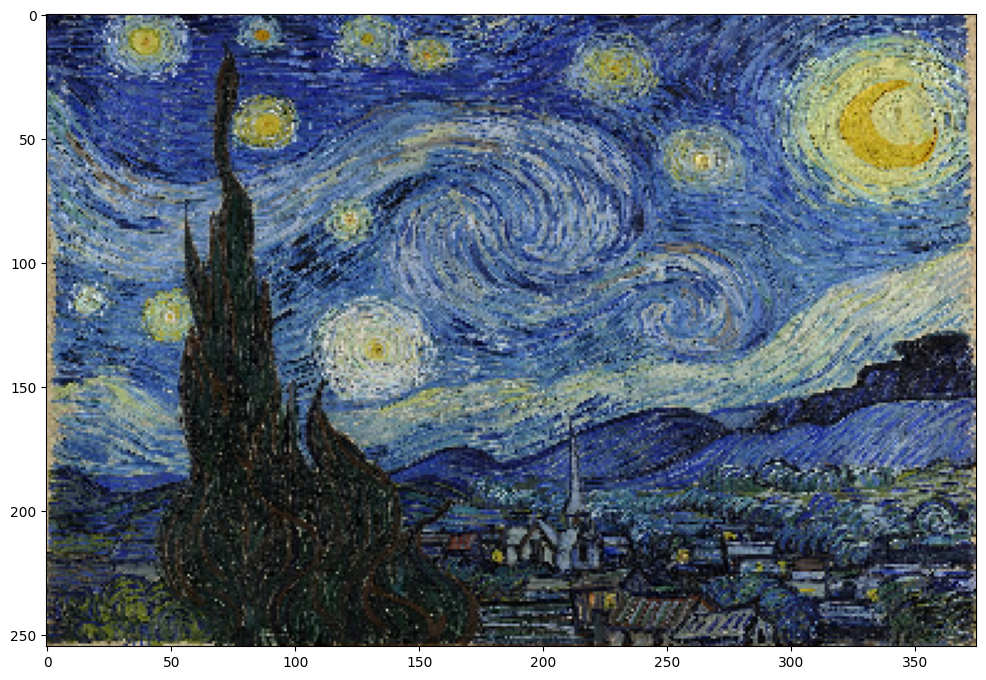

Epoch 0 loss 0.614254355430603


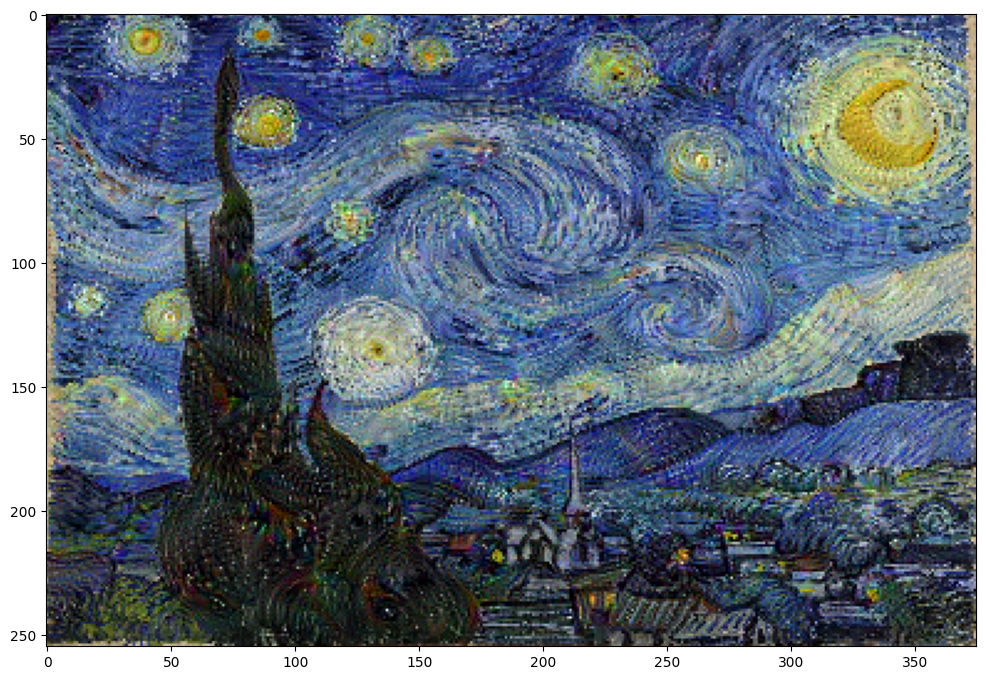

Epoch 200 loss 1.6868003606796265


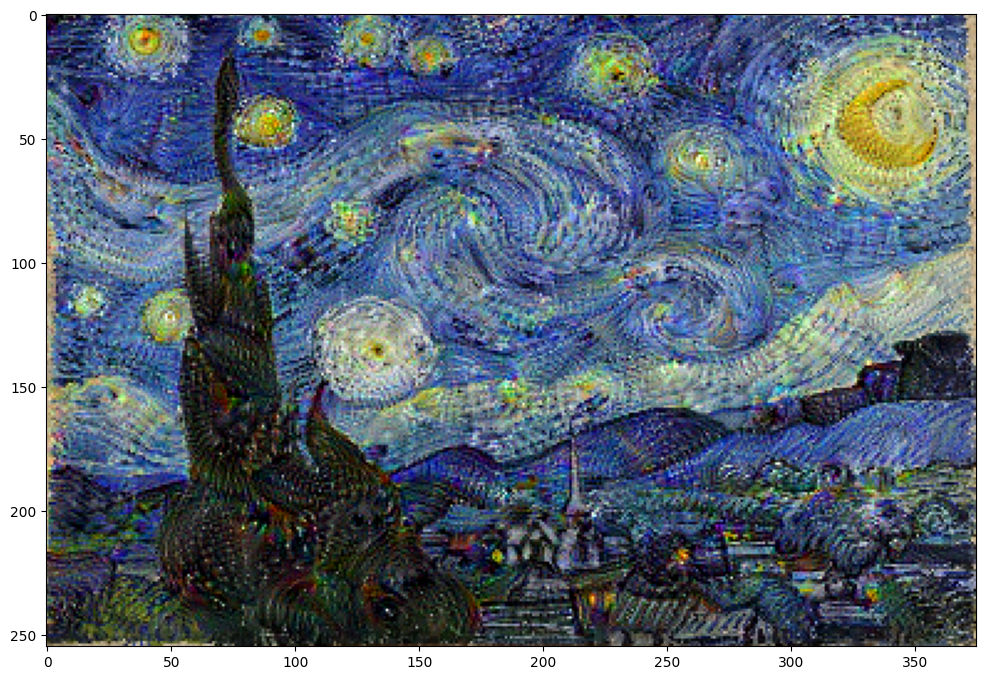

Epoch 400 loss 1.9984567165374756


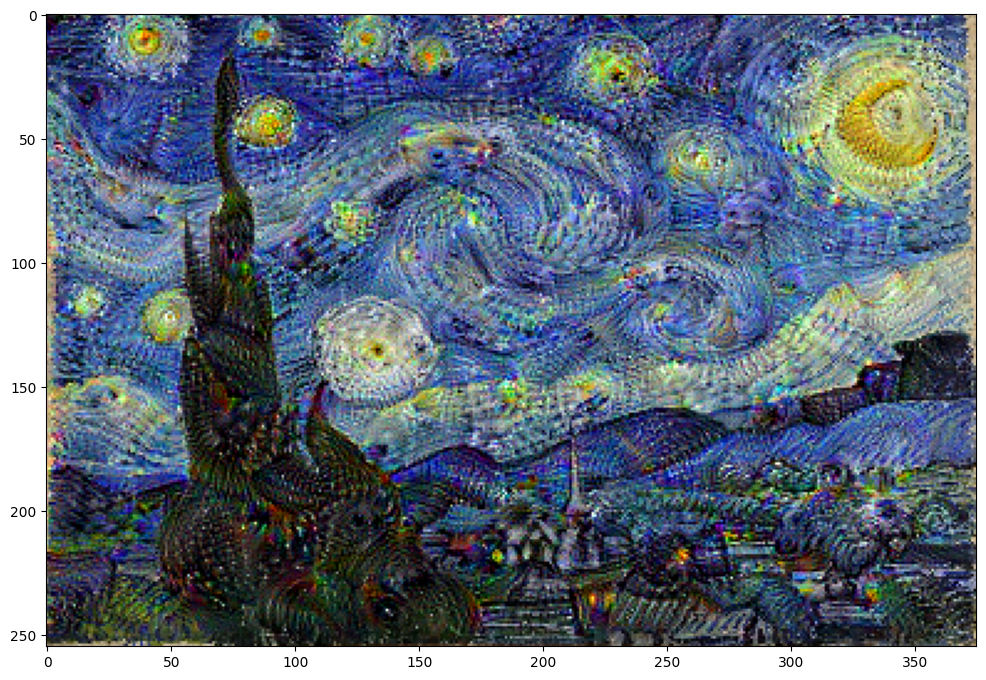

Epoch 600 loss 2.1832613945007324


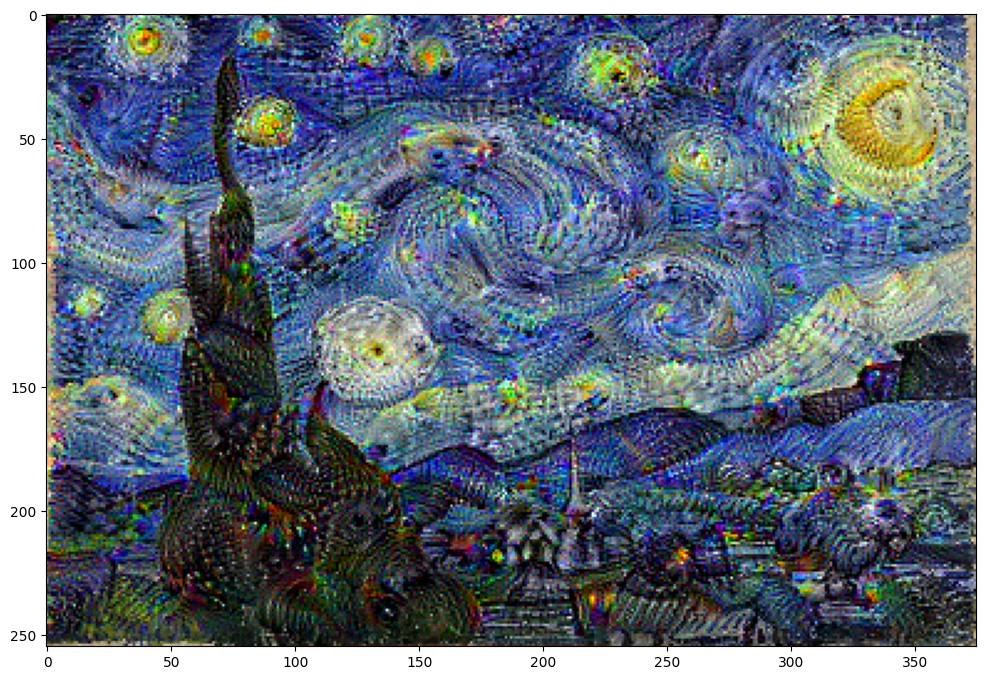

Epoch 800 loss 2.3200697898864746


KeyboardInterrupt: 

In [ ]:
run_deep_dream(network = deep_dream_model, image=image, epochs=8000, learning_rate=0.001)